# Project 2

#### In this project you are going to predict the overall rating of soccer player based on their attributessuch as 'crossing','finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

## Import data

In [76]:
import sqlite3 #for using sql query 

In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # modelling 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split # validation
from sklearn.metrics import mean_squared_error  # metrics
from math import sqrt # mathamtical calculation

In [78]:
cnx = sqlite3.connect('database.sqlite') #create a connection object for sql db
# database.sqlite IS SQLITE file downloaded from KAGGLE.COM used for importing the dataset

In [79]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) #saving data from selelct query in the form of dataframe

In [80]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Exploratery data analysis

In [81]:
df.dtypes #TO chack datatypes of the all the columns

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [82]:
df.describe() #for numeric variable to get stats 

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [83]:
df.shape   #nrows and ncols

(183978, 42)

In [84]:
df.groupby('player_fifa_api_id').count()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_fifa_api_id,,,,,,,,,,,,,,,,,,,,,
2,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
6,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
11,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
27,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
28,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
41,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
58,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
61,9,9,9,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [85]:
df['player_fifa_api_id'].value_counts() # to check ids with no of time occurance

184431    96
193061    56
178393    56
155887    54
173210    53
184267    53
168650    52
41635     51
179605    50
183284    50
198394    50
184826    48
153048    48
102056    48
1625      48
182495    47
112847    47
137494    47
125995    47
202126    46
178518    46
186627    46
183569    46
51412     46
7743      46
7763      46
166851    46
192387    46
202539    46
186405    45
          ..
199228     2
220991     2
190370     2
189500     2
20481      2
219505     2
232665     2
139756     2
233911     2
202425     2
189768     2
189867     2
194061     2
204308     2
201426     2
205642     2
230012     2
200839     2
229500     2
224355     2
211106     2
192386     2
189572     2
15715      2
190215     2
178442     2
230036     2
147915     2
225191     2
143419     2
Name: player_fifa_api_id, Length: 11062, dtype: int64

### Missing data calculation

In [86]:
missing= df.isnull().sum() #missing values in the dataframe

In [87]:
missing

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [88]:
percent_of_missing= (df.isnull().sum()/df.isnull().count())*100 

In [89]:
percent_of_missing #is showing percent of the nulls present in every columns

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In [90]:
df['overall_rating'].max() #max rating of the player 

94.0

In [91]:
df['overall_rating'].min()

33.0

This dataset has NaN but less than 5% which can be ignored. hence dropped the rows having NaN

In [92]:
df1=df.dropna() #dropping all the rows having atleast one NaN


In [93]:
print("No of rows and columns of the original data", df.shape)
print("No of rows and columns of the data after NA removed",  df1.shape)



No of rows and columns of the original data (183978, 42)
No of rows and columns of the data after NA removed (180354, 42)


<h4>Since ids have no impact on overall ratings of the player we can remove the columns having player ids</h4>

In [94]:
correlations= df.corr()['overall_rating'].sort_values()
correlations

player_api_id        -0.322389
player_fifa_api_id   -0.274089
id                   -0.002875
gk_handling           0.004410
gk_reflexes           0.005687
gk_positioning        0.005709
gk_kicking            0.025682
gk_diving             0.027976
sliding_tackle        0.128889
marking               0.133377
balance               0.160364
standing_tackle       0.165349
agility               0.239896
acceleration          0.245655
interceptions         0.250370
sprint_speed          0.254841
jumping               0.259023
heading_accuracy      0.314099
strength              0.318661
aggression            0.323934
stamina               0.327456
finishing             0.329298
free_kick_accuracy    0.349592
dribbling             0.354324
crossing              0.357699
curve                 0.357772
volleys               0.361470
positioning           0.370019
long_shots            0.392382
penalties             0.393189
shot_power            0.427996
vision                0.431137
long_pas

<h4>Three columns player_api_id, player_fifa_api_id and id are negatively weak correlated and hence removing them from dataset</h4>

In [95]:
Target=df['overall_rating']

In [96]:
del df1['id']
del df1['player_fifa_api_id']
del df1['player_api_id']

In [97]:
df1.shape #after removing three columns (id, player_fifa_api_id, player_api_id) from the dataframe

(180354, 39)

In [98]:
df1.columns   #columns present in the dataframe

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

### To create features using OHE we need to know which are the ones having object as datatype.

In [99]:
total_obj=df1.columns[df1.dtypes.values=='object'] #to column having datatype as object 
total_obj

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [100]:
#df['positioning'] is numeric
#df['gk_handling']
#df['heading_accuracy']
#df['aggression']
#df['heading_accuracy']
#df['marking']

In [101]:
from datetime import datetime
from dateutil import parser
df1.loc[:,'date']= df1['date'].apply(pd.to_datetime) # converting date from object datatype to pandas datetime 
 

C:\Users\ANURAG\Anaconda4\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [102]:
df1.loc[:,'month']=df1['date'].apply(lambda x: x.month)
df1.loc[:,'year']=df1['date'].apply(lambda x: x.year)
df1.loc[:,'day']=df1['date'].apply(lambda x: x.day)


C:\Users\ANURAG\Anaconda4\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANURAG\Anaconda4\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [103]:
df1.columns[df1.dtypes.values=='object']  

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [104]:
df1.shape


(180354, 42)

In [105]:
df1.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'month', 'year', 'day'],
      dtype='object')

#### features having object datatype will be used to create more features using one hot encoding. 

In [106]:
#to check no of categories in the categorical variable

print("categories under preferred foot")
print(df['preferred_foot'].value_counts())
print("-------------------------------------")

print("categories under Attacking work rate")
print(df1['attacking_work_rate'].value_counts())
print("-------------------------------------")

print("categories under defensive work rate")
print(df1['defensive_work_rate'].value_counts())

categories under preferred foot
right    138409
left      44733
Name: preferred_foot, dtype: int64
-------------------------------------
categories under Attacking work rate
medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64
-------------------------------------
categories under defensive work rate
medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64


In [107]:
df1['defensive_work_rate'].value_counts().index


Index(['medium', 'high', 'low', 'o', '1', '2', 'ormal', '3', '5', '7', '0',
       '6', '9', '4', 'es', 'tocky', 'ean', '8'],
      dtype='object')

In [114]:
cols=['o','1','2','3','5','4','6','7','8','9','ormal','0','ean','tocky','es']


In [115]:
for ind in cols:
    df1.drop(df1.index[df1['defensive_work_rate']==ind],inplace=True)
        

C:\Users\ANURAG\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
df1['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
Name: defensive_work_rate, dtype: int64

In [117]:
df1['attacking_work_rate'].value_counts().index
col_attack=['norm','stoc','le','y']
for ind in col_attack:
    df1.drop(df1.index[df1['attacking_work_rate']==ind],inplace=True)

C:\Users\ANURAG\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [126]:
df1['attacking_work_rate'].value_counts() # After removal of other irrelevant classes

medium    124871
high       42751
low         8539
None         158
Name: attacking_work_rate, dtype: int64

<h1>Plots and visualizations</h1>

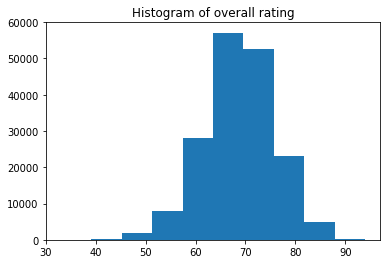

In [121]:
import matplotlib.pyplot as plt
plt.hist(df1['overall_rating'])
plt.title("Histogram of overall rating")
plt.show( )           #histogram showing distribution of the dependant variable overall fitting

In [119]:
df1.head()

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,month,year,day
0,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2,2016,18
1,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,11,2015,19
2,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,9,2015,21
3,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,3,2015,20
4,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2,2007,22


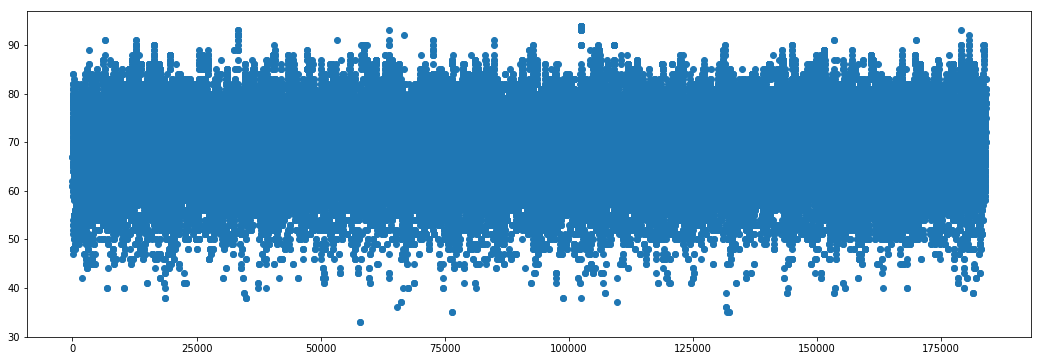

In [122]:
plt.figure(figsize=(18,6))
plt.scatter(df['id'],df['overall_rating']) #to check the relationship between id and dependant variable

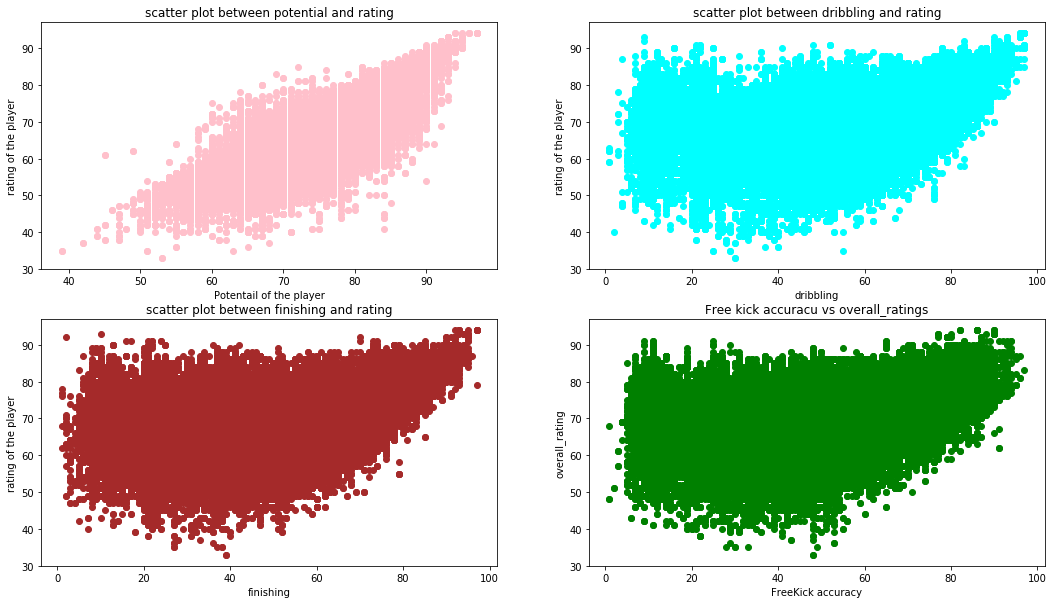

In [123]:
#scatter plot between potential and rating

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.scatter(df['potential'],df['overall_rating'],color='pink')
plt.xlabel("Potentail of the player")
plt.ylabel("rating of the player")
plt.title("scatter plot between potential and rating")

#dribbling vs overall_ratings
plt.subplot(2,2,2)
plt.scatter(df['dribbling'],df['overall_rating'],color='cyan')
plt.xlabel("dribbling")
plt.ylabel("rating of the player")
plt.title("scatter plot between dribbling and rating")

# Finishing vs overall_ratings
plt.subplot(2,2,3)
plt.scatter(df['finishing'],df['overall_rating'],color='brown')
plt.xlabel("finishing")
plt.ylabel("rating of the player")
plt.title("scatter plot between finishing and rating")

# free kick accuracy vs overall ratings
plt.subplot(2,2,4)
plt.scatter(df['free_kick_accuracy'],df['overall_rating'],color='green')
plt.xlabel("FreeKick accuracy")
plt.ylabel("overall_rating")
plt.title("Free kick accuracu vs overall_ratings")
plt.show()

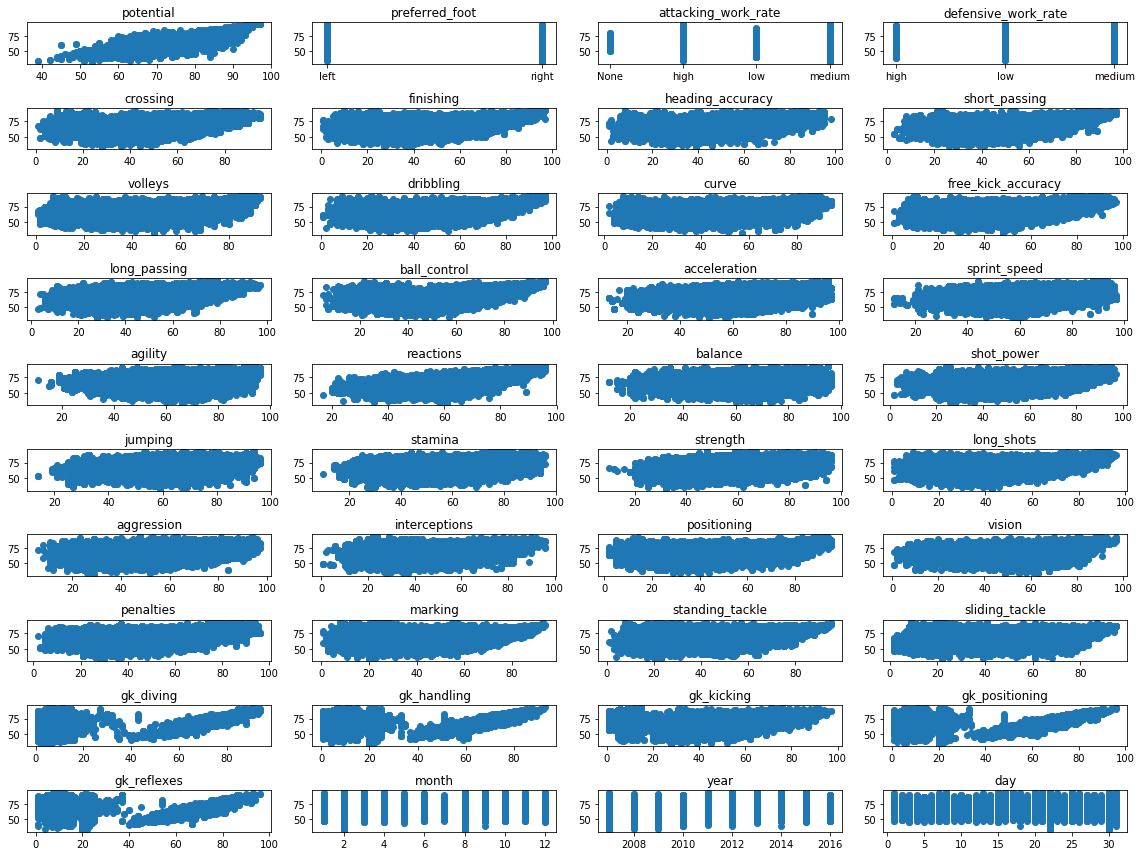

In [124]:
col=list(df1.columns)
cols=col[1:]
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < 41:
        ax.scatter(df1[cols[i+1]], df1[cols[0]])
        ax.set_title(cols[i+1])
plt.tight_layout()

In [125]:
df1.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'month', 'year', 'day'],
      dtype='object')

In [127]:
df1 =  df1.drop("date", axis = 1) # dropping date columns from the dataframe

<h1>Feature Selection and One hot encoding</h1>

In [128]:
for col in ['preferred_foot', 'attacking_work_rate','defensive_work_rate', 'year', 'month','day']:
    dummies=pd.get_dummies(df1[col],prefix=col)
    df1=df1.join(dummies)
    df1=df1.drop(col,axis=1)

In [129]:
df1.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_left',
       'preferred_foot_right', 'attacking_work_rate_None',
       'attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'month_1',
       'month_2

In [130]:
df1.head()


,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,0,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
df1.shape

(176319, 97)

In [132]:
df1.dropna(inplace=True)

<h1>Creating training and test set</h1>

In [133]:
y=df1.pop('overall_rating')
x=df1

In [134]:
y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [135]:
x.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,0,0,0,0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,0,0,0,0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,0,0,0,0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,1,0,0,0,0,0,0,0,0,0


In [136]:
#creating training and test set for dependant and independant variable
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [137]:
train_x.shape #trainingg set of X

(141055, 96)

In [138]:
test_x.shape  #test set of X

(35264, 96)

In [139]:
train_y.shape    #train set of y

(141055,)

In [140]:
test_y.shape    #test set of y

(35264,)

<h3>Using SKlearn </h3>

In [141]:
lm=LinearRegression()  # instantiating Linear regression 
lm.fit(train_x,train_y)  #fitting the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
print(lm.intercept_) # intercept beta0
print(lm.coef_)       #gradient beta1 to beta_n

-3.4231711687973245
[ 3.87688444e-01  2.55259170e-02  1.13940609e-02  7.14606800e-02
  3.17558672e-02  4.92895234e-03 -1.86185742e-02  7.71667219e-03
  1.24373287e-02  9.33881849e-03  1.29357845e-01  7.93954567e-03
  1.35207892e-02 -1.20085646e-02  1.98738065e-01  8.75557753e-03
  1.60821102e-02  1.28286749e-02 -1.26222336e-03  5.20732535e-02
 -1.63222874e-02  2.14709443e-02  2.07172056e-02 -9.14725347e-03
  1.10801228e-02  1.89045589e-02  2.90938154e-02  1.01231725e-03
 -2.95090655e-02  1.26036977e-01  3.70573889e-02  2.16063069e-04
  5.68197085e-02  2.86160743e-02  8.99550379e-03 -8.99550379e-03
 -1.20161863e+00 -4.36825461e-02  1.29987261e+00 -5.45714335e-02
 -9.12148983e-02  3.91845871e-01 -3.00630973e-01 -1.08719361e+00
 -2.24975951e+00 -1.92092619e+00 -1.01531417e+00  2.51173196e-01
  9.31071359e-01  1.00169235e+00  1.12437605e+00  1.32175126e+00
  1.64312927e+00 -1.75399582e-01 -1.01689916e-01 -1.32487944e-01
  6.69890571e-03 -4.02527334e-02 -6.97264603e-02 -1.43657329e-01
  9.9

In [143]:
pred_train= lm.predict(test_x) # predicting test set

In [144]:
 # In order to check the model accuracy we are using metric root mean square error
    
import numpy as np
np.sqrt(mean_squared_error(test_y, pred_train))

2.677860460149065

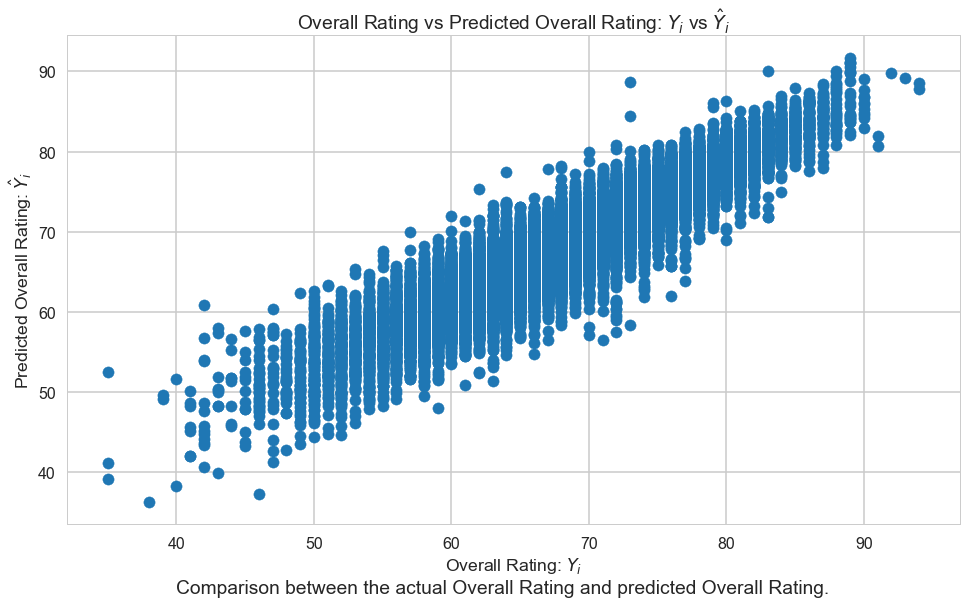

In [159]:
import seaborn as sns # visualization
sns.set_style("whitegrid") # for background
sns.set_context("poster")
plt.figure(figsize=(16,9)) # size of the figure
plt.scatter(test_y,pred_train) # scatter plot
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()

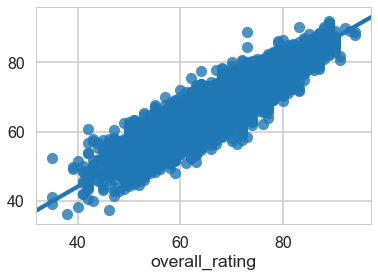

In [160]:
sns.regplot(test_y,pred_train, data=df1, fit_reg=True) #Plot test_y and pred_train for Linear Regression Model.


In [157]:
# recursive feature elimination
from sklearn.feature_selection import RFE
rfe = RFE(lm,10 )
rfe = rfe.fit(df1,y)
print(rfe.support_)
print(rfe.ranking_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False  True  True  True False False False
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False]
[ 5 45 71 25 29 82 67 73 61 72 19 80 60 75  6 74 69 68 85 34 70 48 57 79
 78 52 54 86 55 20 43 87 28 50 81 76  1 59  2 51 53 47  1  1  1  3  4 42
  1  1  1  1  1 23 35 32 84 49 30 18 14  9 16 13 56 33  8 83 21 40 26 46
 17 77 39 22 24 58 63 36  7 11 65 41 10 31 38 15 27 64 37 44 66 12  1 62]



<h1>Using Statsmodels OLS package</h1>

In [ ]:
### stats model 

In [145]:
import statsmodels.formula.api as smf 
lm1=smf.ols(formula='train_y ~ train_x',data=train_x).fit()  # fitting stats model
#second method of linear regression modelling(OLS)(ordinary least square method)

In [146]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                train_y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     9158.
Date:                Wed, 15 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:46:35   Log-Likelihood:            -3.3946e+05
No. Observations:              141055   AIC:                         6.791e+05
Df Residuals:                  140964   BIC:                         6.800e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4890      0.055    -27.271      0.000      -1.596      -1.382
train_x[0]      0.3877      0.002    240.922      0.000       0.385       0.391
train_x[1]      0.0255      0.001     27.521      0.000       0.024       0.027
train_x[2]      0.0114      0.001     11.274      0.000       0.009       0.013
train_x[3]      0.0715      0.001     79.637      0.000       0.070       0.073
train_x[4]      0.0318      0.002     20.798      0.000       0.029       0.035
train_x[5]      0.0049      0.001      5.466      0.000       0.003       0.007
train_x[6]     -0.0186      0.001    -14.467      0.000      -0.021      -0.016
train_x[7]      0.0077      0.001      8.780      0.000       0.006       0.009
train_x[8]      0.0124      0.001     15.892      0.000       0.011       0.014
train_x[9]      0.0093      0.001      9.010      0.000       0.007       0.011
train_x[10]     0.1294      0.002     74.131      0.000       0.126       0.133
train_x[11]     0.0079      0.002      5.254      0.000       0.005       0.011
train_x[12]     0.0135      0.001      9.441      0.000       0.011       0.016
train_x[13]    -0.0120      0.001    -10.810      0.000      -0.014      -0.010
train_x[14]     0.1987      0.001    165.819      0.000       0.196       0.201
train_x[15]     0.0088      0.001     10.213      0.000       0.007       0.010
train_x[16]     0.0161      0.001     16.670      0.000       0.014       0.018
train_x[17]     0.0128      0.001     16.136      0.000       0.011       0.014
train_x[18]    -0.0013      0.001     -1.405      0.160      -0.003       0.000
train_x[19]     0.0521      0.001     56.397      0.000       0.050       0.054
train_x[20]    -0.0163      0.001    -16.267      0.000      -0.018      -0.014
train_x[21]     0.0215      0.001     28.434      0.000       0.020       0.023
train_x[22]     0.0207      0.001     25.313      0.000       0.019       0.022
train_x[23]    -0.0091      0.001    -10.458      0.000      -0.011      -0.007
train_x[24]     0.0111      0.001     11.341      0.000       0.009       0.013
train_x[25]     0.0189      0.001     23.013      0.000       0.017       0.021
train_x[26]     0.0291      0.001     23.620      0.000       0.027       0.032
train_x[27]     0.0010      0.001      0.711      0.477      -0.002       0.004
train_x[28]    -0.0295      0.001    -24.276      0.000      -0.032      -0.027
train_x[29]     0.1260      0.002     75.221      0.000       0.123       0.129
train_x[30]     0.0371      0.002     17.702      0.000       0.033       0.041
train_x[31]     0.0002      0.001      0.263      0.792      -0.001       0.002
train_x[32]     0.0568      0.002     27.308      0.000       0.053       0.061
train_x[33]     0.0286      0.002     13.973      0.000       0.025       0.033
train_x[34]    -0.7355      0.029    -25.31

In [147]:
lm1.rsquared #to check r squared metric for training set

0.8539467814355253

In [149]:
lm1.conf_int()

,0,1
Intercept,-1.596048,-1.382014
train_x[0],0.384534,0.390842
train_x[1],0.023708,0.027344
train_x[2],0.009413,0.013375
train_x[3],0.069702,0.073219
train_x[4],0.028763,0.034748
train_x[5],0.003162,0.006696
train_x[6],-0.021141,-0.016096
train_x[7],0.005994,0.009439
train_x[8],0.010903,0.013971


In [150]:
y_pred1=lm1.predict(train_x) #using stat model predict the y

In [151]:
np.sqrt(mean_squared_error(train_y, y_pred1))

2.6848351156488803

<h2>  sklearn K fold cross validation</h2>

#### We have already seen that using sklearn Lm model we got 2.677 RMSE now we want to validate our model on validation set and using 10 fold cross validation. if our model predicts the rating of soccer player with the same RMSE then our model is not overfitted.

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score  # cross_validation score

cv_score= cross_val_score(LinearRegression(),x,y,scoring='neg_mean_squared_error', cv=10)

In [155]:
cv_score # since we have used k=10 there are 10 cv scores

array([-7.43781582, -6.98342797, -7.14991695, -7.23780666, -7.06380917,
       -7.62227272, -7.10430487, -7.26765014, -7.37507622, -7.15731219])

<h4>calculating mean and square root to get cv_score</h4>

In [156]:
cv_score, cv_score.mean()# MSE is determined by taking mean of cv score 
np.sqrt(cv_score.mean() * -1)# RMSE

2.6907135246777916

In [161]:
print("The Root Mean Square Error (RMSE) for the Model is "+ str(np.sqrt(cv_score.mean() * -1)) )

The Root Mean Square Error (RMSE) for the Model is 2.6907135246777916
